In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import golden
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from numpy.linalg import inv
from numpy import linalg

%matplotlib inline

In [6]:
data = np.loadtxt('data.csv', delimiter=',')

## b)

In [85]:
X = data.T[:2].T
Y = data.T[2]
clf = LinearDiscriminantAnalysis(store_covariance=True)
clf.fit(X, Y)
print('covariance %s' %clf.covariance_)
print('means %s' %clf.means_)
print('priors %s' %clf.priors_)

covariance [[1.11872866 0.45204323]
 [0.45204323 0.71371048]]
means [[ 1.93477872 -2.97498216]
 [ 5.85647767 -1.11750415]]
priors [0.485 0.515]


## c)

In [81]:
def w(clf):
    mu1, mu0 = clf.means_
    sigma = clf.covariance_
    
    output = (mu1-mu0)@inv(sigma)
    
    return output

def b(clf):
    mu1, mu0 = clf.means_
    sigma = clf.covariance_
    p0, p1 = clf.priors_
    
    output = 0.5*(mu0@inv(sigma)@mu0-mu1@inv(sigma)@mu1) + np.log(p0/p1)
    
    return output

def linear(x, clf):
    x = np.array(x)
    w0, w1 = w(clf)
    bb = b(clf)
    
    output = (-w0*x-bb)/w1
    
    return output

In [78]:
print('w = %s' %w(clf))
print('b = %s' %b(clf))

w = [-3.2978957  -0.51377501]
b = 11.736048868281351


## d)

In [209]:
# @np.vectorize
def p_matrix(X, clf, i):
    mus = clf.means_[i]
    sigma = clf.covariance_

    a = 2*np.pi*np.sqrt(linalg.det(sigma))
    b = -0.5*((X-mus)@inv(sigma)@(X-mus))
    
    output = np.exp(b)/a
    
    return output

In [ ]:
mesh_X, mesh_Y = np.meshgrid(xs,_ys)  
mesh = np.stack((mesh_X, mesh_Y), axis=2)
res0 = np.array([[P_0(row) for row in col] for col in mesh])
res1 = np.array([[P_1(row) for row in col] for col in mesh])
ax.contour(mesh_X, mesh_Y, res0, levels=np.logspace(-3, -1.7, 7), alpha=0.5)
ax.contour(mesh_X, mesh_Y, res1, levels=np.logspace(-3, -1.7, 7), alpha=0.5)

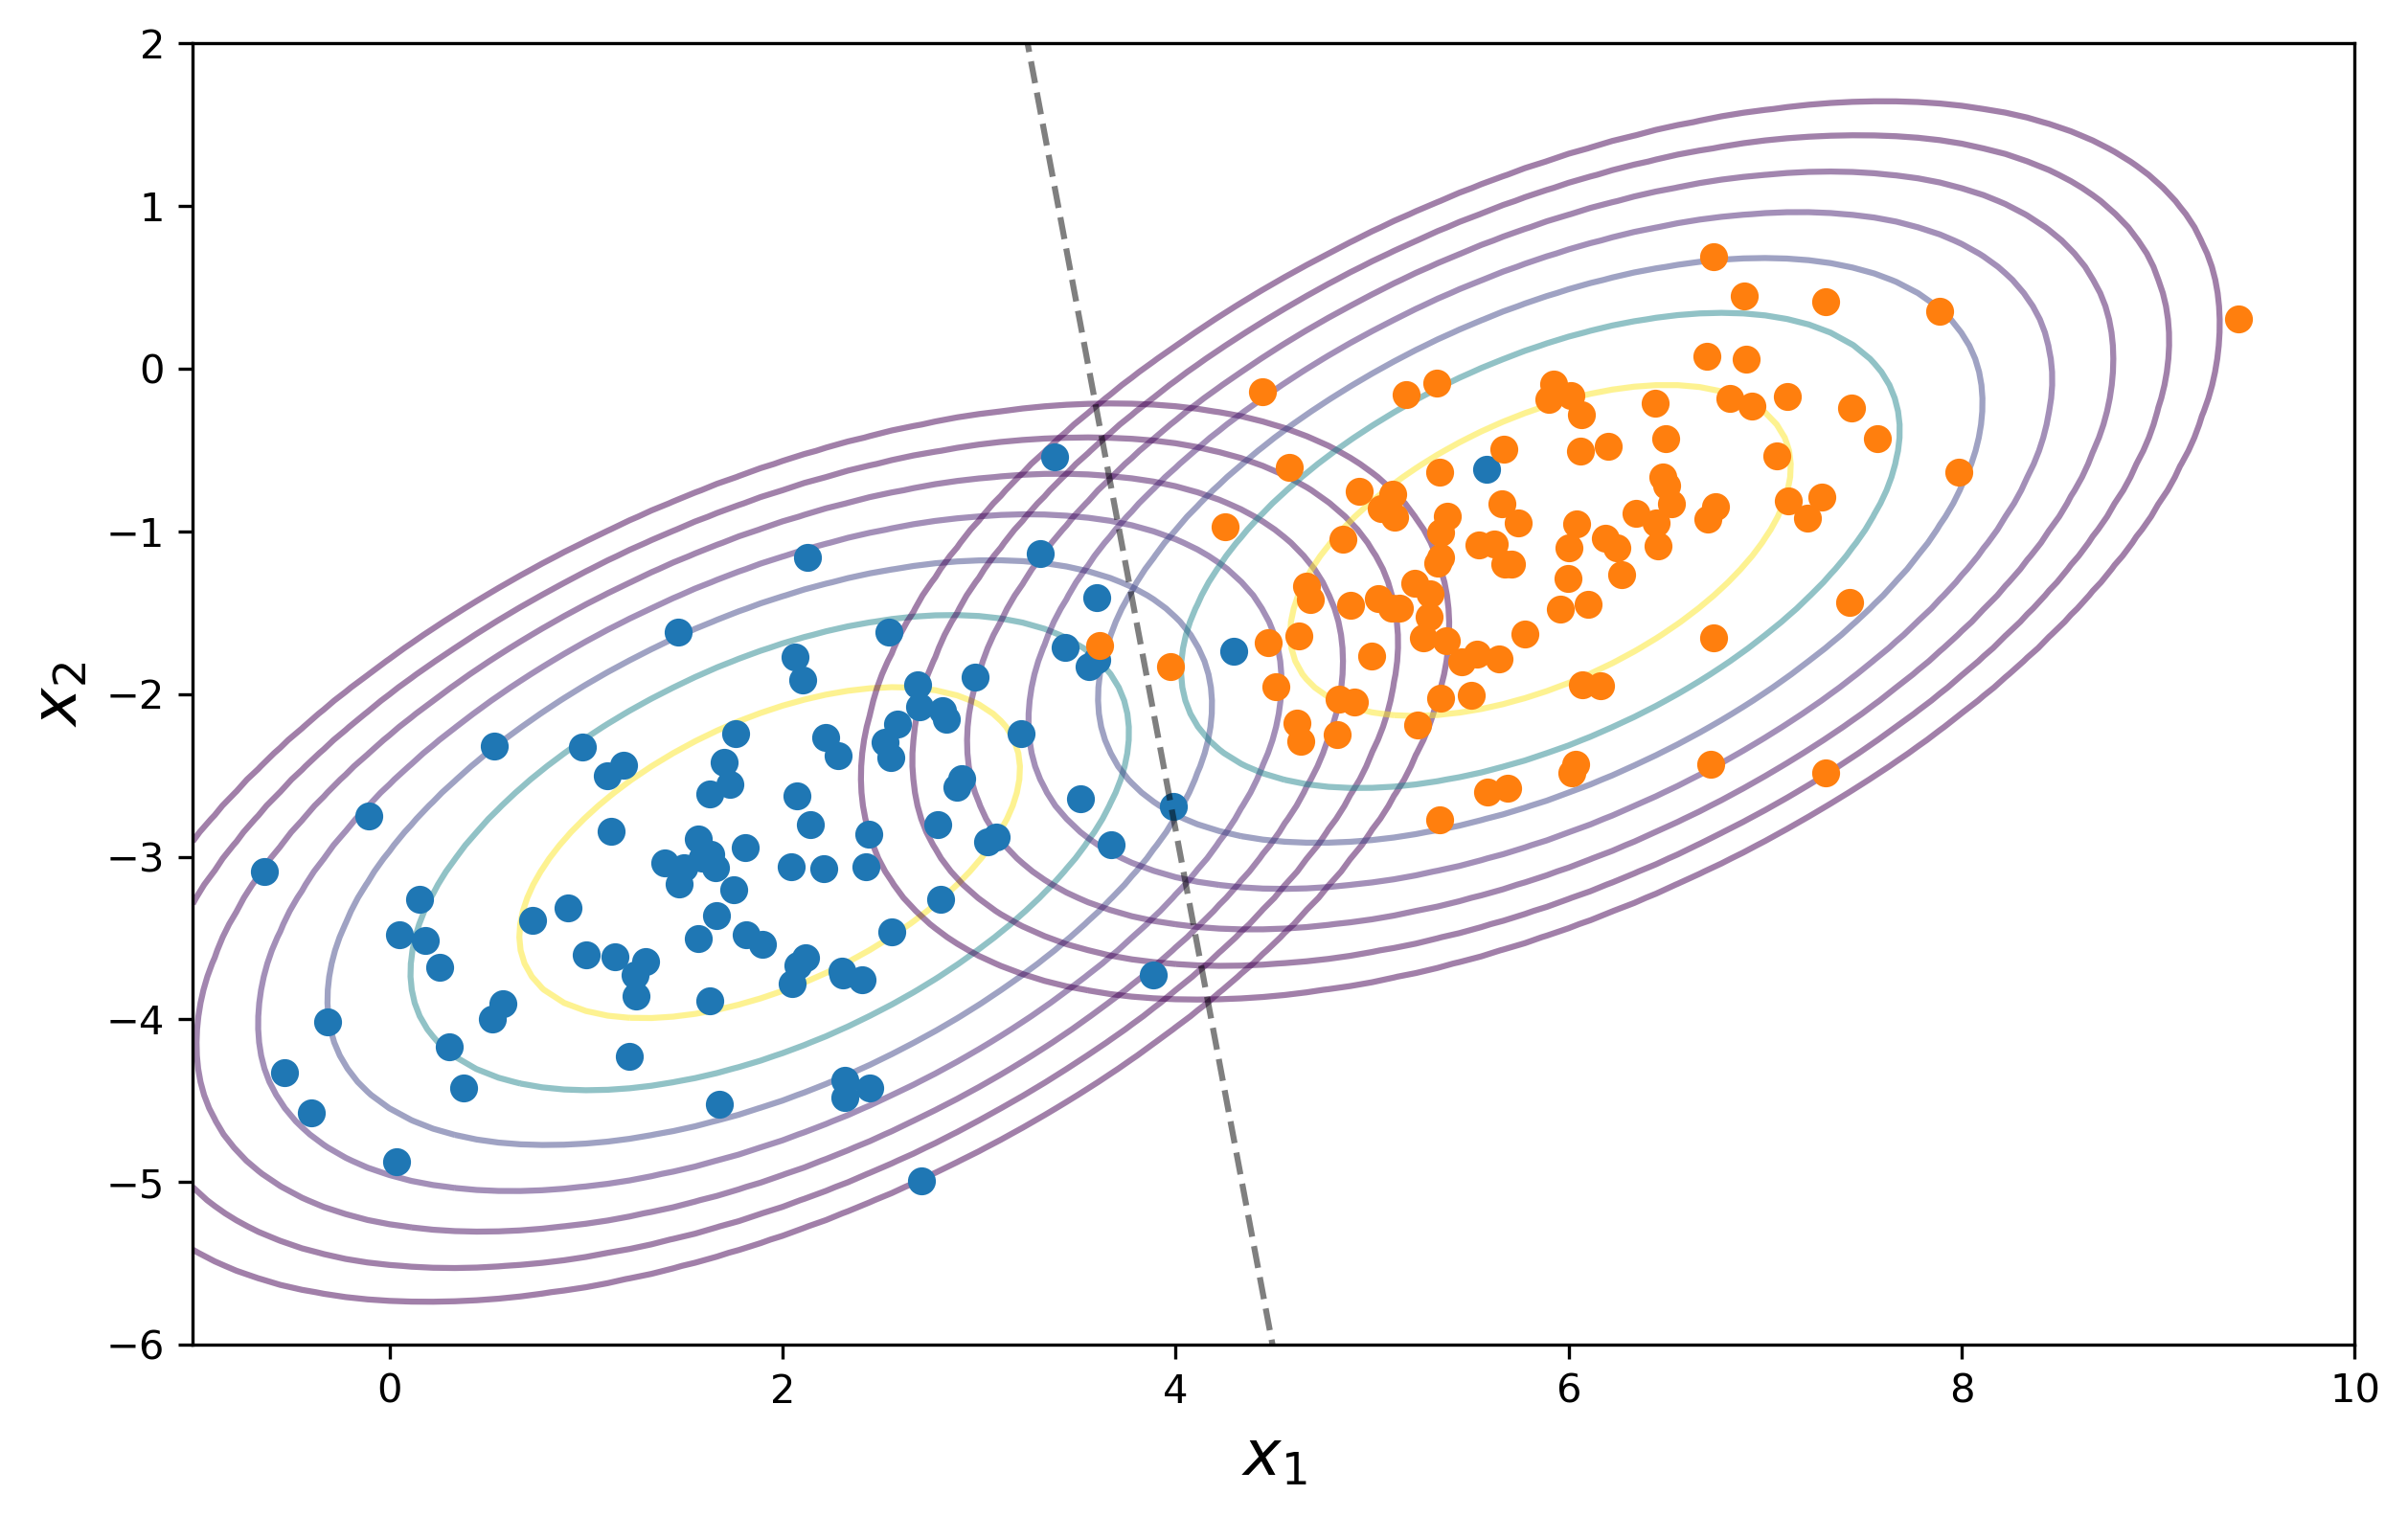

In [228]:
xx = np.linspace(-1, 10, 100)
yy = np.linspace(-6, 2, 100)

X = np.array(np.meshgrid(xx,yy))
mesh = np.stack(X, axis=2)

xfit = np.linspace(-1, 10, 100)
fig, ax = plt.subplots(figsize=(6*golden, 6), dpi=300)
for label in [0, 1]:
    truth = data.T[2] == label
    x = data.T[0][truth]
    y = data.T[1][truth]
    ax.plot(x, y, linestyle='', marker='o')
ax.plot(xfit, linear(xfit, clf), linestyle='--', color='k', alpha=0.5)
for i in [0,1]:
    Z = np.array([[p_matrix(row, clf, i) for row in col] for col in mesh])
    ax.contour(X[0], X[1], Z, levels=np.logspace(-3, -1, 7), alpha=0.5)
ax.set_xlabel('$x_1$', fontsize=16)
ax.set_ylabel('$x_2$', fontsize=16)
ax.set_ylim(-6, 2)
fig.savefig('6_4.png', bbox_inches='tight')